# Project2 : 붓꽃 분류

## 1. 데이터셋
+ seaborn에서 붓꽃에 대한 데이터를 제공함
+ 부꽃의 품종에 영향을 미치는 요인은 무엇인지 파악하고 모델학습을 통해 품종을 예측하고자함


## 2. 데이터 확인 및 전처리

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기 
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# 데이터 전처리 : 결측값 확인
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## 3. 학습/평가 데이터 분할
+ 학습 데이터와 평가 데이터를 8:2 비율로 분할함

In [5]:
# 학습/평가 데이터 분할 (8:2 비율)
X = df.drop(columns='species')
y = df['species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. 데이터 탐색

In [6]:
# 요약 통계량
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.842857,3.009524,3.870476,1.239048
std,0.833304,0.418910,1.721355,0.742720
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.700000,0.400000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.500000


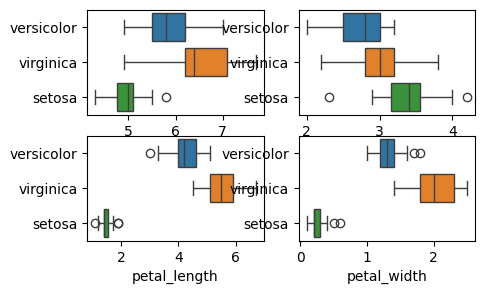

In [7]:
# 상자수염 그래프
df_train = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(5,3))
for i, feature in enumerate(X_train.columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=feature, y='species', hue='species', data= df_train)
    plt.ylabel('')
plt.show()

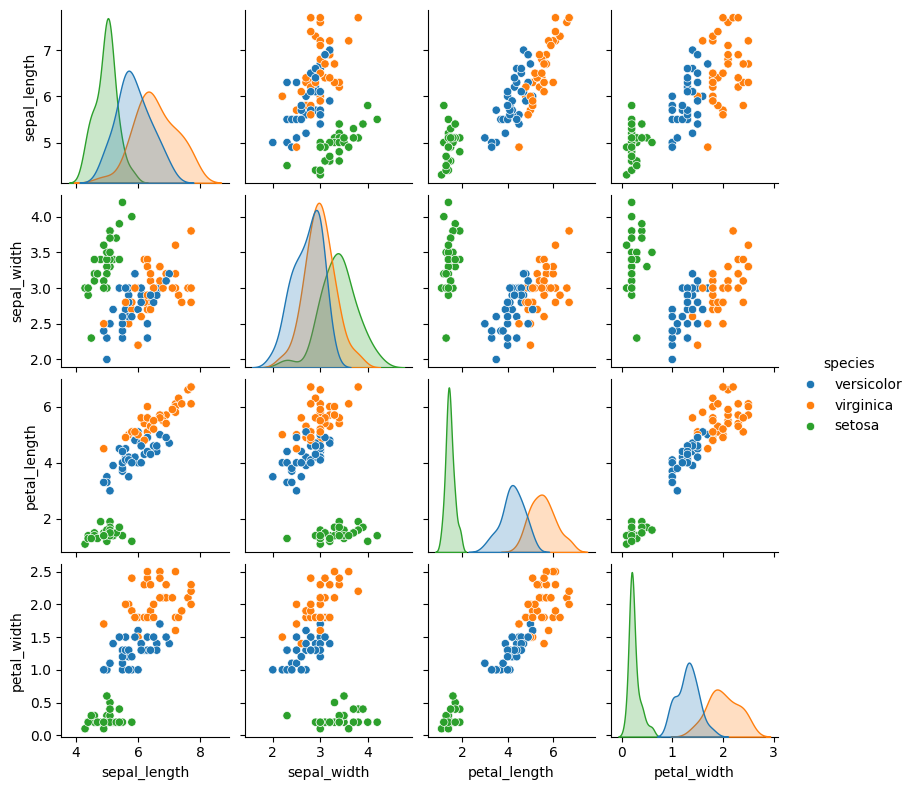

In [8]:
# 산점도
sns.pairplot(df_train, hue='species', height=2, )
plt.show()

## 5. 분류모델 학습 및 평가

In [9]:
# 최적의 k 값 선택
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1, 20, 2)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print(f'k={k}일 때 정확도 : {scores.mean():.3f}')
    
    

k=1일 때 정확도 : 0.952
k=3일 때 정확도 : 0.933
k=5일 때 정확도 : 0.943
k=7일 때 정확도 : 0.952
k=9일 때 정확도 : 0.943
k=11일 때 정확도 : 0.933
k=13일 때 정확도 : 0.943
k=15일 때 정확도 : 0.933
k=17일 때 정확도 : 0.933
k=19일 때 정확도 : 0.943


In [10]:
# 모델 성능이 가장 좋은 k 값 선택
best_k = k_range[k_scores.index(max(k_scores))]
print(f"최적의 k 값은 {best_k}이며, 평균 정확도는 {max(k_scores):.3f}")

최적의 k 값은 1이며, 평균 정확도는 0.952


In [11]:
# K-NN 분류모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score

#학습데이터로 학습한 분류모델에 평가데이터를 입력하여 클래스 분류
y_pred = knn.predict(X_test)

# 분류모델 평가 : 정확도, 정밀도, 재현도
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy =accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print(f"정확도 : {accuracy:.3f}")
print(f"정밀도 : {precision:.3f}")
print(f"재현율 : {recall:.3f}")

정확도 : 1.000
정밀도 : 1.000
재현율 : 1.000
